In [1]:
# IMPORTS

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from scipy.spatial.transform import Rotation as R
from typing import List, Tuple
import os

# %matplotlib widget

In [6]:
# HELPER FUNCTIONS

# load dataset
def load_data(data_path, key_path):
    data = np.load(data_path, allow_pickle=True)
    key = np.load(key_path, allow_pickle=True).item()
    print("Loaded data and key.")
    print("Data shape: ", data.shape)
    print("Key length: ", len(key))
    return data, key

# plot force, position, and raw sensor data
def plot_initial_data(plot_data, plot_key):

    # plot force data over time
    force_fig, force_ax = plt.subplots(1,1)
    force_ax.plot(plot_data[:, plot_key["time"]], plot_data[:, plot_key["Fx"]], label="Fx")
    force_ax.plot(plot_data[:, plot_key["time"]], plot_data[:, plot_key["Fy"]], label="Fy")
    force_ax.plot(plot_data[:, plot_key["time"]], plot_data[:, plot_key["Fz"]], label="Fz")
    force_ax.set_title("Force")
    force_ax.legend()
    plt.tight_layout()
    plt.show()

    # plot x,y,z location over time
    loc_fig, loc_ax = plt.subplots(1,1)
    loc_ax.plot(plot_data[:, plot_key["time"]], plot_data[:, plot_key["x_act"]], label="x")
    loc_ax.plot(plot_data[:, plot_key["time"]], plot_data[:, plot_key["y1_act"]], label="y")
    loc_ax.plot(plot_data[:, plot_key["time"]], plot_data[:, plot_key["z_act"]], label="z")
    loc_ax.set_title("Location")
    loc_ax.legend()
    plt.tight_layout()
    plt.show()

    # plot all sensor data over time
    sensor_fig, sensor_ax = plt.subplots(3,12, figsize=(80,20))
    sensor_keys = []
    for k in list(plot_key.keys()):
        if 's' in k: # TODO: this might break if we add more columns to the dataset
            sensor_keys.append(k)
    k = 0
    for i in range(3):
        for j in range(12):
            cur_key = sensor_keys[k]
            sensor_ax[i,j].plot(plot_data[:, plot_key["time"]], plot_data[:, plot_key[cur_key]], label=cur_key)
            sensor_ax[i,j].set_title(cur_key)
            sensor_ax[i,j].set_ylim(-35000, 35000)
            k += 1
    plt.show()

def plot_single_sensor_data(input_data, input_key, sensor_to_plot):
    fig, ax = plt.subplots(3,1)
    ax[0].plot(input_data[:, input_key["time"]], input_data[:, input_key["Fz"]], label="Fz")
    ax[0].set_title("Fz")
    ax[1].plot(input_data[:, input_key["time"]], input_data[:, input_key["z_act"]], label="z")
    ax[1].set_title("z")
    ax[2].plot(input_data[:, input_key["time"]], input_data[:, input_key[sensor_to_plot]], label=sensor_to_plot)
    ax[2].set_title(sensor_to_plot)
    plt.tight_layout()
    plt.show()


Loaded data and key.
Data shape:  (12098, 51)
Key length:  51


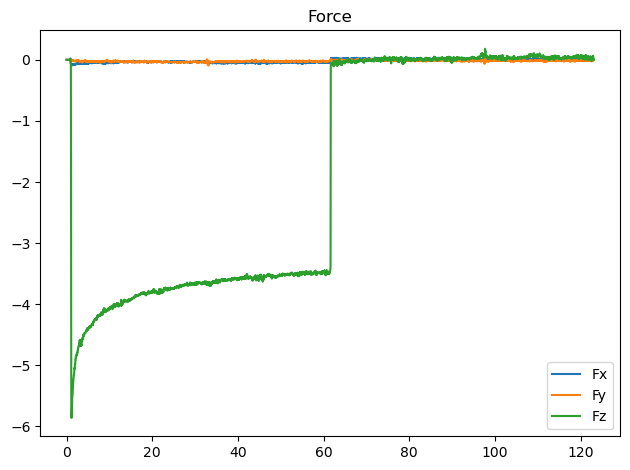

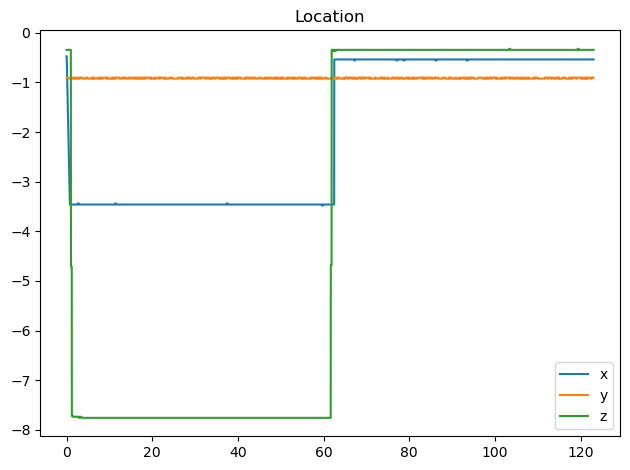

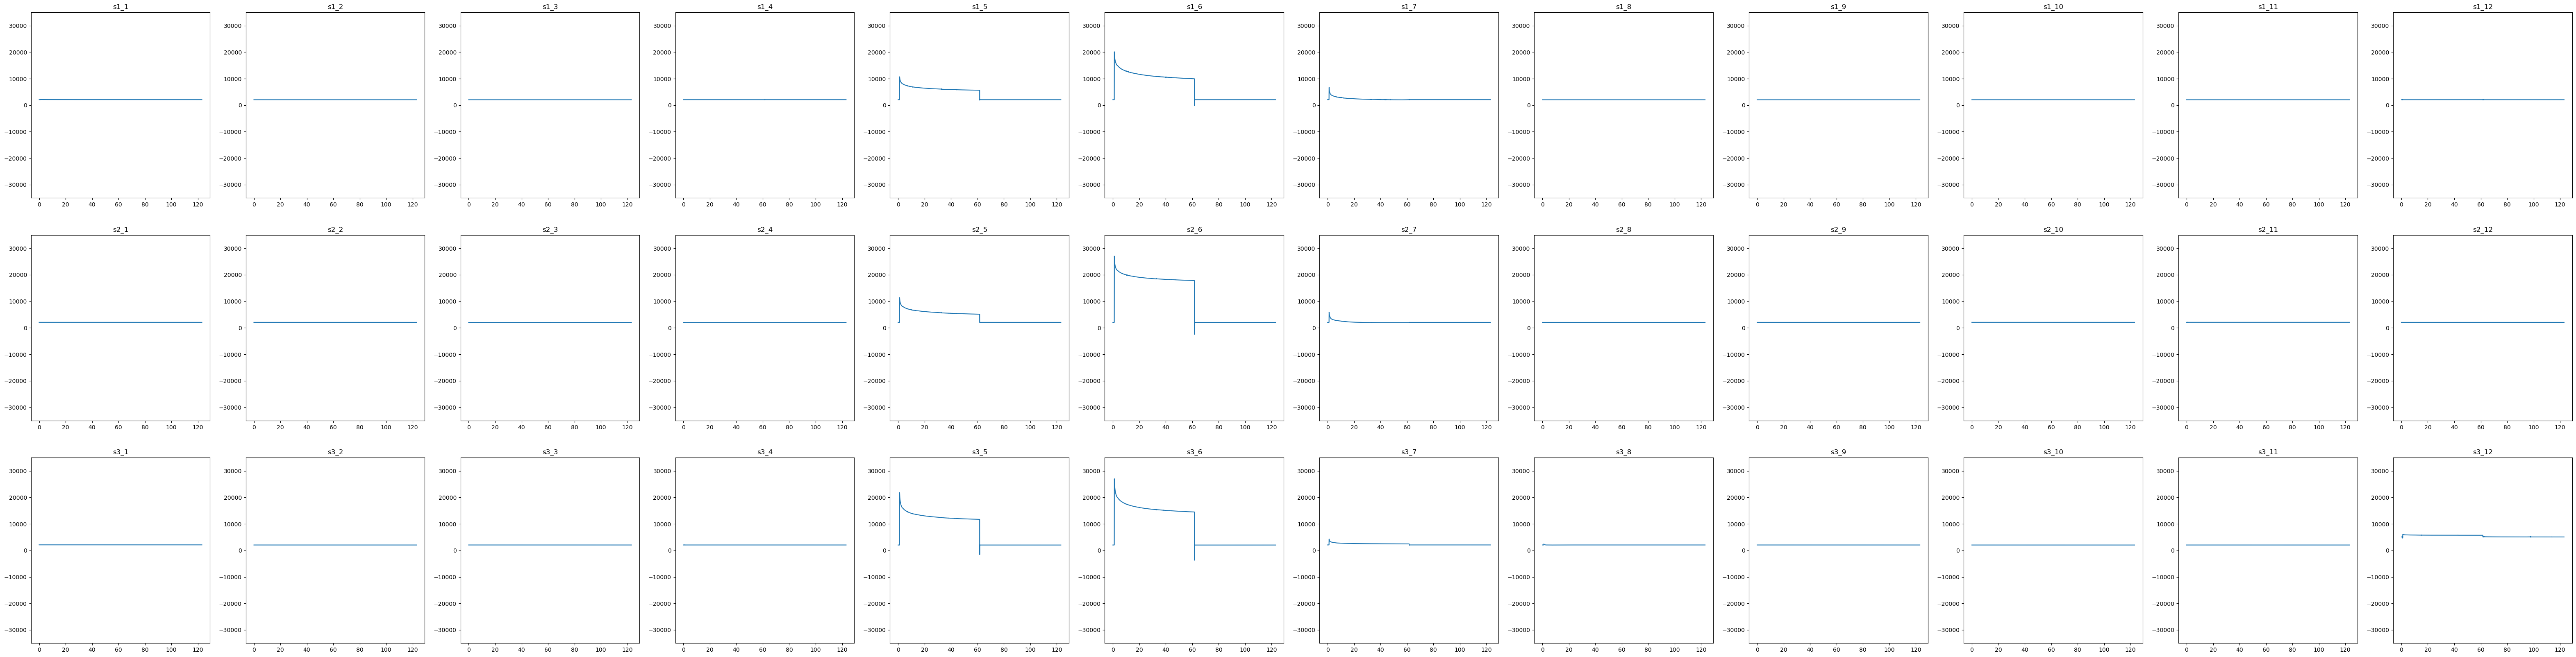

In [7]:
test_path = "raw_data/2024-11-15_14-45-37.807944_SINGLEPRESS_BP_COMBO"

# load data
data_path = os.path.join(test_path, "processed.npy")
key_path = os.path.join(test_path, "key.npy")
data, key = load_data(data_path, key_path)

plot_initial_data(data, key)

# Planned plots
- Looking at stress-relaxation time constant during press
- Also looking at how quickly pressure values snap back after end of press
- Overlay responses of nearby sensors, grouped by cardinal direction (top-bottom, left-right, and diagonal)?
    - Looking at peaks and time constants of those sensor responses


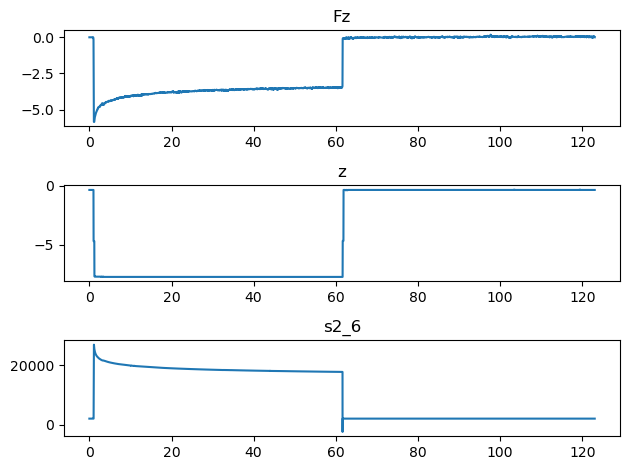

In [ ]:
# PLOT FOR S2_6, DIRECTLY UNDER STIMULUS

# start with generic plot
plot_single_sensor_data(data, key, "s2_6")

# fit time-constant to pressure response?

# zoom into unloading phase behavior

# plot 3x3 grid around s2_6

# plot all 9 on same plot, trimming time to just first 30ish seconds
# label based on distance from s2_6?
# 3 plots, 1 per row, with data from 3 sensors on each?
